# Sales Analysis

#### Import necessary libraries

In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

## Loading in the data

In [61]:
def get_data():
    
    path = 'sales_data/'
    all_dfs = []

    for file in os.listdir(path):

        df = pd.read_csv(path + file)

        all_dfs.append(df)

    return pd.concat(all_dfs)


In [62]:
data = get_data()
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301"
14367,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016"
14368,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001"
14369,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301"


# Data Cleaning

### remove nulls and sort data out

In [63]:
def clean(df):
    
    df = df.dropna()
    
    df = df[df['Order Date'].str[0:2] != 'Or']
    
    df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
    
    df['Price Each'] = pd.to_numeric(df['Price Each'])
    
    return df
    

In [64]:
data = clean(data)

In [65]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301"
14367,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016"
14368,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001"
14369,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301"


### Split date column into constituent parts

In [66]:
def split_date(df):
    
    df['Month'] = df['Order Date'].str[0:2]
    df['Month'] = pd.to_numeric(df['Month'])
    
    df['Day'] = df['Order Date'].str[3:5]
    df['Day'] = pd.to_numeric(df['Day'])
    
    df['Year'] = df['Order Date'].str[6:8]
    df['Year'] = pd.to_numeric(df['Year'])
    
    df['Hour'] = df['Order Date'].str[9:11]
    df['Hour'] = pd.to_numeric(df['Hour'])
    
    df['Minute'] = df['Order Date'].str[12:14]
    df['Minute'] = pd.to_numeric(df['Minute'])
        
    return df.drop('Order Date', axis=1)


In [67]:
data = split_date(data)

### Split address into parts

In [69]:
def get_first_line(address):
    return address.split(",")[0].strip()

def get_city(address):
    return address.split(",")[1].strip()

def get_state(address):
    return address.split(",")[2].strip().split(" ")[0]

def get_zip_code(address):
    return address.split(",")[2].strip().split(" ")[1]


def split_address(df):
    
    df['Address First Line'] = df['Purchase Address'].apply(get_first_line)
    
    df['City'] = df['Purchase Address'].apply(get_city)
    
    df['State'] = df['Purchase Address'].apply(get_state)
    
    df['Zip Code'] = df['Purchase Address'].apply(get_zip_code)
        
    return df.drop('Purchase Address', axis=1)


data = split_address(data)

In [70]:
data

,Order ID,Product,Quantity Ordered,Price Each,Month,Day,Year,Hour,Minute,Address First Line,City,State,Zip Code
0,259358,34in Ultrawide Monitor,1,379.99,10,28,19,10,56,609 Cherry St,Dallas,TX,75001
1,259359,27in 4K Gaming Monitor,1,389.99,10,28,19,17,26,225 5th St,Los Angeles,CA,90001
2,259360,AAA Batteries (4-pack),2,2.99,10,24,19,17,20,967 12th St,New York City,NY,10001
3,259361,27in FHD Monitor,1,149.99,10,14,19,22,26,628 Jefferson St,New York City,NY,10001
4,259362,Wired Headphones,1,11.99,10,7,19,16,10,534 14th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,7,20,19,16,16,694 Meadow St,Atlanta,GA,30301
14367,236666,20in Monitor,1,109.99,7,31,19,20,11,866 14th St,San Francisco,CA,94016
14368,236667,AAA Batteries (4-pack),1,2.99,7,17,19,22,29,249 Cherry St,Dallas,TX,75001
14369,236668,Wired Headphones,1,11.99,7,30,19,19,28,727 Wilson St,Austin,TX,73301


# Data Exploration

## Question 1: What was the best month for sales? How much was earned that month? 

In [71]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [72]:
data

,Order ID,Product,Quantity Ordered,Price Each,Month,Day,Year,Hour,Minute,Address First Line,City,State,Zip Code,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10,28,19,10,56,609 Cherry St,Dallas,TX,75001,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10,28,19,17,26,225 5th St,Los Angeles,CA,90001,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10,24,19,17,20,967 12th St,New York City,NY,10001,5.98
3,259361,27in FHD Monitor,1,149.99,10,14,19,22,26,628 Jefferson St,New York City,NY,10001,149.99
4,259362,Wired Headphones,1,11.99,10,7,19,16,10,534 14th St,Los Angeles,CA,90001,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,7,20,19,16,16,694 Meadow St,Atlanta,GA,30301,11.99
14367,236666,20in Monitor,1,109.99,7,31,19,20,11,866 14th St,San Francisco,CA,94016,109.99
14368,236667,AAA Batteries (4-pack),1,2.99,7,17,19,22,29,249 Cherry St,Dallas,TX,75001,2.99
14369,236668,Wired Headphones,1,11.99,7,30,19,19,28,727 Wilson St,Austin,TX,73301,11.99


In [75]:
monthly_sales = data[['Month', 'Sales']].groupby(['Month']).sum()

monthly_sales

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


In [106]:
len(range(1, 13))

12

In [107]:
len(months)

12

<IPython.core.display.Javascript object>


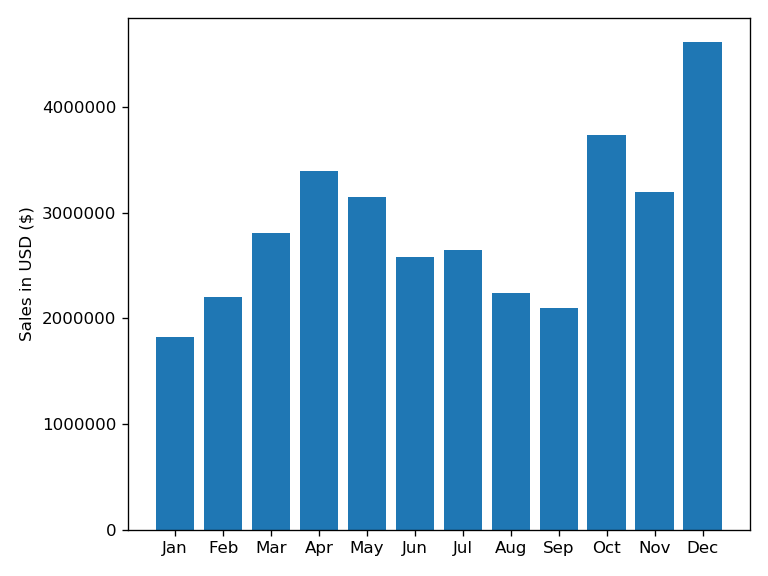

In [109]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure()

plt.bar(range(1, 13), monthly_sales['Sales'])

plt.xticks(ticks=range(1, 13), labels=months)

plt.ylabel('Sales in USD ($)')

plt.tight_layout()


## Question 2: What city sold the most product?

In [84]:
city_sales = data[['City', 'Sales']].groupby(['City']).sum()

city_sales

,Sales
City,
Atlanta,2.795499e+06
Austin,1.819582e+06
Boston,3.661642e+06
Dallas,2.767975e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Portland,2.320491e+06
San Francisco,8.262204e+06
Seattle,2.747755e+06


<IPython.core.display.Javascript object>


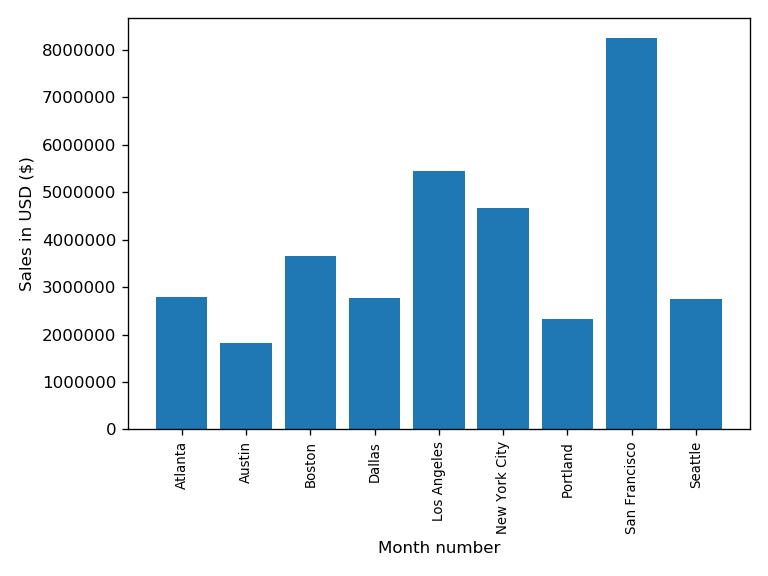

In [88]:
import matplotlib.pyplot as plt

plt.figure()

plt.bar(city_sales.index, data.groupby(['City']).sum()['Sales'])

plt.ylabel('Sales in USD ($)')

plt.xlabel('Month number')

plt.xticks(city_sales.index, rotation='vertical', size=8)

plt.tight_layout()


## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [94]:
hourly_sales = data[['Hour', 'Sales']].groupby('Hour').sum()

hourly_sales

,Sales
Hour,
0,713721.27
1,460866.88
2,234851.44
3,145757.89
4,162661.01
5,230679.82
6,448113.00
7,744854.12
8,1192348.97


<IPython.core.display.Javascript object>


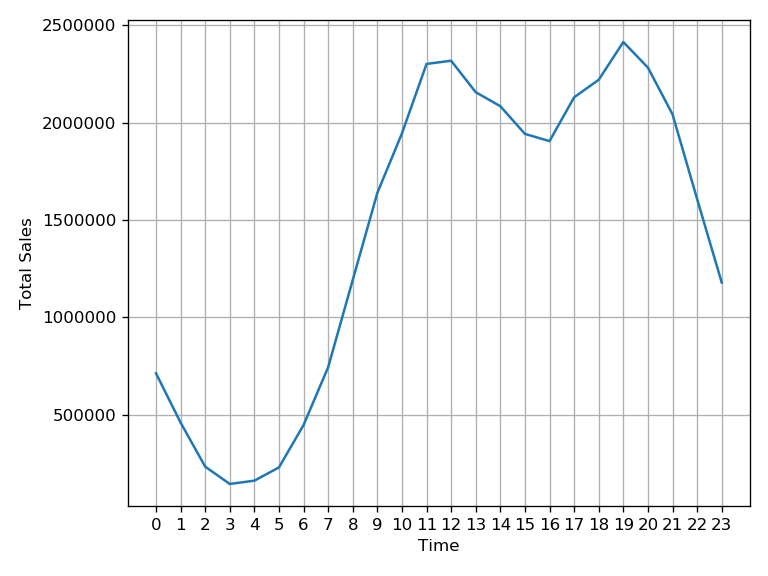

In [103]:
plt.figure()

plt.plot(hourly_sales.index, hourly_sales['Sales'])

plt.xticks(hourly_sales.index)

plt.xlabel('Time')

plt.ylabel('Total Sales')

plt.grid()

plt.tight_layout()

plt.show()